In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile
from IPython.display import display, Latex, Markdown
import plotly.express as px
import plotly.graph_objs as go
plt.rcParams['font.sans-serif'] = "Comic Sans MS"


# Exploring Gender Statistics of TIME Cover Pictures
We can gather some information about gender influentability from our media. Let's take a deep dive into the how many females and males were featured in TIME cover pictures each year from 1923 to 2013.

I am uploading a dataset which I am calling "times", from Kaggle. Its columns are the year, number of females in TIME Cover Pictures, number of males in TIME Cover Pictures, percentage of females in TIME Cover pictures for that year, and percentage of males in TIME Cover pictures for that year. In this Jupyter notebook, we will build a simple linear model to describe the relationship between year and percentage of female TIME cover Pictures. 

In [69]:
times = pd.read_csv("TIMEGenderData.csv") 

#### Let's look at a few rows to see how the data looks.

In [70]:
times.head()

,Year,Female,Male,Total,Female %,Male %
0,1923,1,34,35,2.86%,97.14%
1,1924,4,48,52,7.69%,92.31%
2,1925,1,51,52,1.92%,98.08%
3,1926,7,46,52,13.46%,88.46%
4,1927,4,49,52,7.69%,94.23%


In [71]:
print("First year in the dataset:",times['Year'].min())
print("Last year in the dataset:",times['Year'].max())

First year in the dataset: 1923
Last year in the dataset: 2013


Because the data type of the percentage columns are not numbers, we are going to add a column to this table calculating the female proportion by doing 100*(number of female TIME cover photos)/(total TIME cover photos) for every year. 

In [72]:
times['Female_prop'] = 100*times['Female']/times['Total']

Here is our table with this column added!

In [74]:
times.head()

,Year,Female,Male,Total,Female %,Male %,Female_prop
0,1923,1,34,35,2.86%,97.14%,2.857143
1,1924,4,48,52,7.69%,92.31%,7.692308
2,1925,1,51,52,1.92%,98.08%,1.923077
3,1926,7,46,52,13.46%,88.46%,13.461538
4,1927,4,49,52,7.69%,94.23%,7.692308


Let's create a simple scatterplot to visually check if there is a clear relationship between year and percentage of female TIME cover photos.

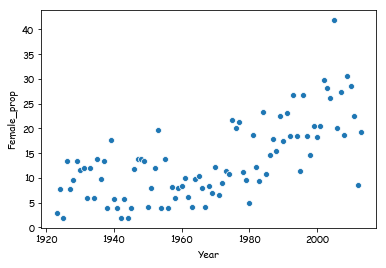

In [75]:
sns.scatterplot(x='Year',y='Female_prop',data=times)

The trend is not clear, but there seems to be a slight increase in the percentage of female TIME cover photos overtime.

## Statistics
These standard unit and correlation calculations should look familiar from your statistics class! This is how you write functions for them in Python.

In [47]:
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

In [57]:
x = times['Year']
y = times['Female_prop']
correlation(x,y)

0.6710651223336219

Using the correlation function we created, we have attained 0.67 as the correlation coefficient for year vs. female percentage of TIME cover pictures.

## More concepts you should have seen in your statistics class
We are going to make a simple y=mx+b line to fit our data as well as possible!

In [49]:
def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(y) - slope(x, y)*np.mean(x)

In [76]:
b = intercept(times['Year'], times['Female_prop'])
m = slope(times['Year'], times['Female_prop'])

print("predicted proportion of female TIMES cover pictures = {} + {} * year".format(np.round(b, 4), np.round(m, 4)))

predicted proportion of female TIMES cover pictures = -381.7536 + 0.2008 * year


Using the slope-intercept formula, we are able to come up with a best fit line for our data. Below, let us plot our actual data points in blue, as well as our best fit line in red, to see the trend in our data.

In [78]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = times['Year'], y = times['Female_prop'], mode = 'markers', name = 'actual'))
fig.add_trace(go.Scatter(x = times['Year'], y = b + m*times['Year'], name = 'linear model', line=dict(color='red')))
fig.update_layout(title="Percentage of Female TIME Cover Pictures from 1923 to 2013",xaxis_title = 'Year', yaxis_title = 'Proportion of Females in TIME Cover Pictures')

### According to our simple linear model, when will the percentage of females in TIME Cover Pictures reach 50%?

50 = -381.7536 + 0.2008 * year
year = 2150

According to our model... not in this lifetime. :(

# Follow Up Questions and Exercises:

### ~ Why are linear equations useful for analyzing data?
### ~ The correlation between year and female proportion was around 0.67. Would you suggest another statistical method to model the data?
### ~ Why is it important to analyze something like TIME cover pictures to learn more about ways in which gender equality persists in our society?

## Challenge: Download your own dataset (.csv) and use this skeleton code to make a simple linear model your data!
    